##agc

In [1]:
import numpy
import pandas
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)
!ls "/content/drive/My Drive"
data_frame = pandas.read_excel('/content/drive/MyDrive/Colab Notebooks/Booking fly.xlsx')

Mounted at /content/drive
'20220310 - Diem thuc tap doanh nghiep ky 2021.1.gdoc'
'2022.05.24 Danh sách CTV GT cụm Bill Gates - Hoàng Mai.xlsx'
'Bai 1_Khai thac CSDL.xlsx'
'Colab Notebooks'
 InforeTech_EntryTest
'IOT - 132667 - 20212'
'Ngoc Lan Vu - CV Data Analyst Intern (1).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern (2).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern (3).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern.pdf'
'Project III - Vũ Thị Ngọc Lan - 20183939'
'Secret Confession.gform'
'Slide Capstone Project - TKXDPM - 20211-converted.pptx'
'Slide Capstone Project - TKXDPM - 20211.zip'
 supermarket_sales.csv
 us_youtube_trending.xlsx


In [2]:
df = data_frame.filter(['income', 'age', 'year_of_school'])
df.corr()

,income,age,year_of_school
income,1.000000,0.154222,0.656587
age,0.154222,1.000000,0.266738
year_of_school,0.656587,0.266738,1.000000


1. Tương quan giữa income - age: 0.154222
2. Tương quan giữa income - year_of_school: 0.656587
3. Tương quan giữa age - year_of_school: 0.266738

               Code    income_type
              count               
income_type                       
high income     121    high income
low income       85     low income
medium income   294  medium income


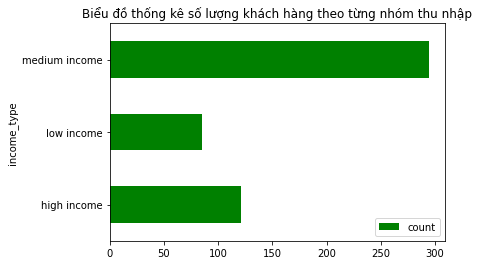

In [40]:
income_type = []
for income in data_frame['income']:
  if income < 9000: income_type.append('low income')
  elif income >= 9000 and income <= 15000: income_type.append('medium income')
  else: income_type.append('high income')

data_frame['income_type'] = income_type
df = data_frame.groupby('income_type').agg({"Code" :['count']})
income_type = df.index
df['income_type'] = income_type
print(df)
df.plot.barh(x = 'income_type', y = 'Code', title = 'Biểu đồ thống kê số lượng khách hàng theo từng nhóm thu nhập', color = 'green')

Số lượng khách hàng theo các nhóm:

1. high income: 121
2. low income: 85
3. medium income: 294

In [4]:
print(data_frame.info())
data_frame['booking_date'] = pandas.to_datetime(data_frame['booking_date'], dayfirst = True)
data_frame['flight_date'] = pandas.to_datetime(data_frame['flight_date'], dayfirst=True)
data_frame['book_flight_day'] = (data_frame['flight_date'] - data_frame['booking_date']).dt.days
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Code                  500 non-null    int64 
 1   area                  500 non-null    object
 2   gender                500 non-null    object
 3   age                   500 non-null    int64 
 4   age_group             500 non-null    object
 5   year_of_school        500 non-null    int64 
 6   degree                500 non-null    object
 7   job                   500 non-null    object
 8   know_english          500 non-null    int64 
 9   know_france           500 non-null    int64 
 10  know_chinese          500 non-null    int64 
 11  income                500 non-null    int64 
 12  booking_date          500 non-null    object
 13  flight_date           500 non-null    object
 14  flight_status         500 non-null    int64 
 15  professionally_staff  500 non-null    in

In [5]:
data_frame['income'] = data_frame['income'].astype(float)
data_frame['extra_income'] = 0
print(data_frame['extra_income'])
data_frame.loc[data_frame.gender == 'female', 'extra_income'] = data_frame.income*0.05
print(data_frame['extra_income'])

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: extra_income, Length: 500, dtype: int64
0      1662.5
1       348.0
2         0.0
3       555.0
4         0.0
        ...  
495       0.0
496       0.0
497     319.5
498     390.0
499       0.0
Name: extra_income, Length: 500, dtype: float64


In [6]:
data_frame['total_income'] = data_frame['income'] + data_frame['extra_income']
print(data_frame['total_income'])

0      34912.5
1       7308.0
2      11100.0
3      11655.0
4      16140.0
        ...   
495    31400.0
496    12930.0
497     6709.5
498     8190.0
499    11790.0
Name: total_income, Length: 500, dtype: float64


In [11]:
data_frame ['tax_income'] = 0
data_frame['tax_income'] = data_frame['tax_income'].astype(float)
for i, x in data_frame.iterrows():
  
  if data_frame.income[i] < 10000: data_frame.tax_income[i] = data_frame.income[i]*0.05
  elif data_frame.income[i] >= 10000 and data_frame.income[i] <= 30000: data_frame.tax_income[i] = data_frame.income[i]*0.07
  else : data_frame.tax_income[i] = data_frame.income[i]*0.1

print(data_frame['tax_income'])
print(data_frame.info())

0      3325.0
1       348.0
2       777.0
3       777.0
4      1129.8
        ...  
495    3140.0
496     905.1
497     319.5
498     390.0
499     825.3
Name: tax_income, Length: 500, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Code                  500 non-null    int64         
 1   area                  500 non-null    object        
 2   gender                500 non-null    object        
 3   age                   500 non-null    int64         
 4   age_group             500 non-null    object        
 5   year_of_school        500 non-null    int64         
 6   degree                500 non-null    object        
 7   job                   500 non-null    object        
 8   know_english          500 non-null    int64         
 9   know_france           500 non-null    int64         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df = data_frame.groupby(data_frame['booking_date'].dt.month)['Code'].count()
month = df.index
df = pandas.DataFrame(df)
df['month'] = month
print(df)

<class 'pandas.core.series.Series'>
              Code  month
booking_date             
1               47      1
2               79      2
3              162      3
4              151      4
5                4      5
6               15      6
8                1      8
9                3      9
10              10     10
11               9     11
12              19     12


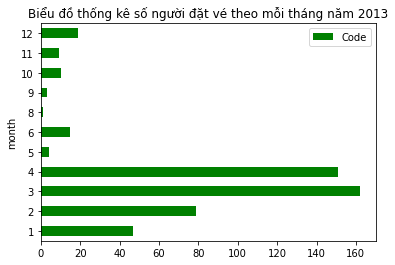

In [34]:
df.plot.barh(x = 'month', y ='Code', title = 'Biểu đồ thống kê số người đặt vé theo mỗi tháng năm 2013', color = 'green')